In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import random
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib notebook

In [175]:
FTSEStocksEachQuarter = pd.read_csv(r'FTSEStocksEachQuarter.csv')
fullStockListDf = pd.read_csv(r'fullFTSEStockList17-20.csv')
fullStockListDf.drop(columns = 'Unnamed: 0', inplace = True)

FTSE = pd.read_csv(r'FTSE17-20.csv')
FTSE['Date'] = pd.to_datetime(FTSE['Date'])
FTSE=FTSE[FTSE['Date'] > datetime.strptime('Jun 16, 2017', '%b %d, %Y').date()]
FTSE=FTSE[FTSE['Date'] < datetime.strptime('Jan 01, 2020', '%b %d, %Y').date()]


quarterCutOffDates = [   datetime.strptime('Jun 19, 2017', '%b %d, %Y').date(), \
                         datetime.strptime('Sep 18, 2017', '%b %d, %Y').date(), \
                         datetime.strptime('Dec 18, 2017', '%b %d, %Y').date(), \
                         datetime.strptime('Mar 19, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Jun 18, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Sep 24, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Dec 24, 2018', '%b %d, %Y').date(), \
                         datetime.strptime('Mar 18, 2019', '%b %d, %Y').date(), \
                         datetime.strptime('Jun 24, 2019', '%b %d, %Y').date(), \
                         datetime.strptime('Sep 23, 2019', '%b %d, %Y').date(),
                          datetime.strptime('Dec 23, 2019', '%b %d, %Y').date()
                        ]
quarterNames = ['Q3,17','Q4,17', 'Q1,18', 'Q2,18', 'Q3,18', 'Q4,18', 'Q1,19', 'Q2,19', 'Q3,19', 'Q4,19']

#quarterCutOffDates.reverse()
#quarterNames.reverse()

FTSE=FTSE[FTSE['Date'] > datetime.strptime('Jun 16, 2017', '%b %d, %Y').date()]
if len(quarterCutOffDates) == 10:
    quarterCutOffDates.append(datetime.strptime('Dec 23, 2019', '%b %d, %Y').date())

indexDivisors = pd.DataFrame({'Quarter CO Date': quarterCutOffDates[1:]}, index = quarterNames)
fullStockListDf

,0
0,AAL
1,ABF
2,ADM
3,AHT
4,ANTO
...,...
110,UU.
111,VOD
112,WG.
113,WPP


In [183]:
tiltWeights = pd.DataFrame(index = fullStockListDf['0'].values)
tiltWeights['weights'] = np.random.uniform(-2,2,tiltWeights.shape[0])
tiltWeights.loc['AAL']

weights    0.606931
Name: AAL, dtype: float64

for each quarter in list of quarters:
    for each stock in list of stocks that quarter
        take stock weight and apply tilt to it
    normalise the array of weights to sum to 1
    multiply weights by market caps for every day of each quarter
    find price of FTSE each day
    

In [184]:
for idx, quarter in enumerate(quarterNames):
    index = FTSE[(FTSE['Date'] >= quarterCutOffDates[idx]) & (FTSE['Date'] < quarterCutOffDates[idx+1])].Date.values
    
    
    stockWeights = pd.read_csv(r'companyWeightsEachQuarter/companyWeights{0}.csv'.format(quarter))
    #print(stockWeights)
    stockWeights.drop(columns = 'Unnamed: 0', inplace = True)
    
    totalMCs = pd.read_csv(r'totalMarketCapsEachQuarter/marketCaps{0}.csv'.format(quarter))
    totalMCs.drop(columns = 'Unnamed: 0', inplace = True)
    
    stockMarketCapsEachQuarter = pd.read_csv(r'companyMarketCapsEachQuarter/companyMarketCaps{0}.csv'.format(quarter))
    stockMarketCapsEachQuarter.drop(columns = 'Unnamed: 0', inplace = True)
    
    #print(stockWeights)
    for stock in FTSEStocksEachQuarter[quarter]:
        stockWeights[stock] = stockWeights[stock].add(tiltWeights.loc[stock][0])
        
    #print(stockWeights)
    stockWeights[stockWeights < 0] = 0
    stockWeightsSums = stockWeights.sum(axis=1)
    #print(stockWeights)
    #normStockWeights = stockWeights.divide(stockWeightsSums,axis=0)
    #print(normStockWeights)
    newMarketCaps = stockWeights*stockMarketCapsEachQuarter.values
    #print(newMarketCaps)
    
    newTotalMarketCaps = newMarketCaps.sum(axis=1).to_frame()
    #print(newTotalMarketCaps)
    if idx == 0:
        indexDivisorForQuarter = newTotalMarketCaps.values[0][0]/(FTSE[FTSE['Date'] == quarterCutOffDates[idx]]['Open'].values[0])
        print('FTSE price on ',quarterCutOffDates[idx], ' = ', FTSE[FTSE['Date'] == quarterCutOffDates[idx]]['Open'].values[0])
    else:
        indexDivisorForQuarter = newTotalMarketCaps.values[0][0]/FTSEPriceQuarterly.values[-1][0]
        print(FTSEPriceQuarterly.values[-1][0])
    #newTotalMarketCaps = newMarketCaps.sum(axis=1)
    
    FTSEPriceQuarterly = newTotalMarketCaps.divide(indexDivisorForQuarter).set_index(index, drop=True)
    #FTSEPriceQuarterly = FTSEPriceQuarterly.divide(100)
    
    if idx == 0:
        FTSEPrice3yr = FTSEPriceQuarterly
        print('new')
    else:
        FTSEPrice3yr = FTSEPrice3yr.append(FTSEPriceQuarterly)
        print('add')

FTSEPrice3yr.rename(columns={0: "Open"},inplace=True) 
FTSEPrice3yr
   

               0
0   1.216149e+12
1   1.218470e+12
2   1.208338e+12
3   1.202182e+12
4   1.195925e+12
..           ...
59  1.200681e+12
60  1.202287e+12
61  1.193096e+12
62  1.196882e+12
63  1.183094e+12

[64 rows x 1 columns]
FTSE price on  2017-06-19  =  7463.5
new
               0
0   1.191843e+12
1   1.194943e+12
2   1.200018e+12
3   1.201143e+12
4   1.197972e+12
..           ...
60  1.245981e+12
61  1.254682e+12
62  1.262612e+12
63  1.258966e+12
64  1.250083e+12

[65 rows x 1 columns]
7260.643522388839
add
               0
0   1.270718e+12
1   1.271807e+12
2   1.271833e+12
3   1.269272e+12
4   1.280112e+12
..           ...
57  1.203812e+12
58  1.197994e+12
59  1.181366e+12
60  1.178824e+12
61  1.178553e+12

[62 rows x 1 columns]
7615.435392839093
add
               0
0   1.183725e+12
1   1.168785e+12
2   1.169998e+12
3   1.157788e+12
4   1.143441e+12
..           ...
56  1.270627e+12
57  1.279689e+12
58  1.266534e+12
59  1.257566e+12
60  1.277846e+12

[61 rows x 1 columns]
7063.08

,Open
2017-06-19,7463.500000
2017-06-20,7477.742454
2017-06-21,7415.564509
2017-06-22,7377.783599
2017-06-23,7339.382096
...,...
2019-12-16,6984.932782
2019-12-17,7130.085821
2019-12-18,7163.311449
2019-12-19,7206.993571


In [167]:
totalMCs.values
normStockWeights.multiply(totalMCs.values,axis=0).sum(axis=1)
stockWeights

,III,ABF,ADM,AAL,ANTO,AHT,AZN,AUTO,AV.,BA.,...,STJ,TW.,TSCO,TUI,ULVR,UU.,VOD,WG.,WTB,WPP
0,0.0,0.448142,0.0,1.718025,0.0,0.0,1.707055,0.0,0.0,0.0,...,0.0,0.0,0.428484,1.279638,0.543843,0.0,0.320672,0.134625,0.0,0.939242
1,0.0,0.448150,0.0,1.718018,0.0,0.0,1.707242,0.0,0.0,0.0,...,0.0,0.0,0.428442,1.279636,0.543896,0.0,0.320526,0.134621,0.0,0.939247
2,0.0,0.448184,0.0,1.717908,0.0,0.0,1.707955,0.0,0.0,0.0,...,0.0,0.0,0.428281,1.279605,0.544029,0.0,0.320770,0.134608,0.0,0.939322
3,0.0,0.448163,0.0,1.718018,0.0,0.0,1.708112,0.0,0.0,0.0,...,0.0,0.0,0.428313,1.279640,0.544158,0.0,0.320949,0.134612,0.0,0.939363
4,0.0,0.448175,0.0,1.718074,0.0,0.0,1.708595,0.0,0.0,0.0,...,0.0,0.0,0.428299,1.279590,0.544139,0.0,0.321087,0.134615,0.0,0.939338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.0,0.448417,0.0,1.720790,0.0,0.0,1.704777,0.0,0.0,0.0,...,0.0,0.0,0.429052,1.280038,0.545404,0.0,0.319968,0.134556,0.0,0.937591
61,0.0,0.448509,0.0,1.720782,0.0,0.0,1.705174,0.0,0.0,0.0,...,0.0,0.0,0.428924,1.280069,0.544962,0.0,0.319817,0.134550,0.0,0.937580
62,0.0,0.448535,0.0,1.720411,0.0,0.0,1.704380,0.0,0.0,0.0,...,0.0,0.0,0.428915,1.280065,0.545061,0.0,0.319946,0.134544,0.0,0.937612
63,0.0,0.448624,0.0,1.720414,0.0,0.0,1.704460,0.0,0.0,0.0,...,0.0,0.0,0.429037,1.280046,0.544933,0.0,0.319612,0.134564,0.0,0.937658


<IPython.core.display.Javascript object>


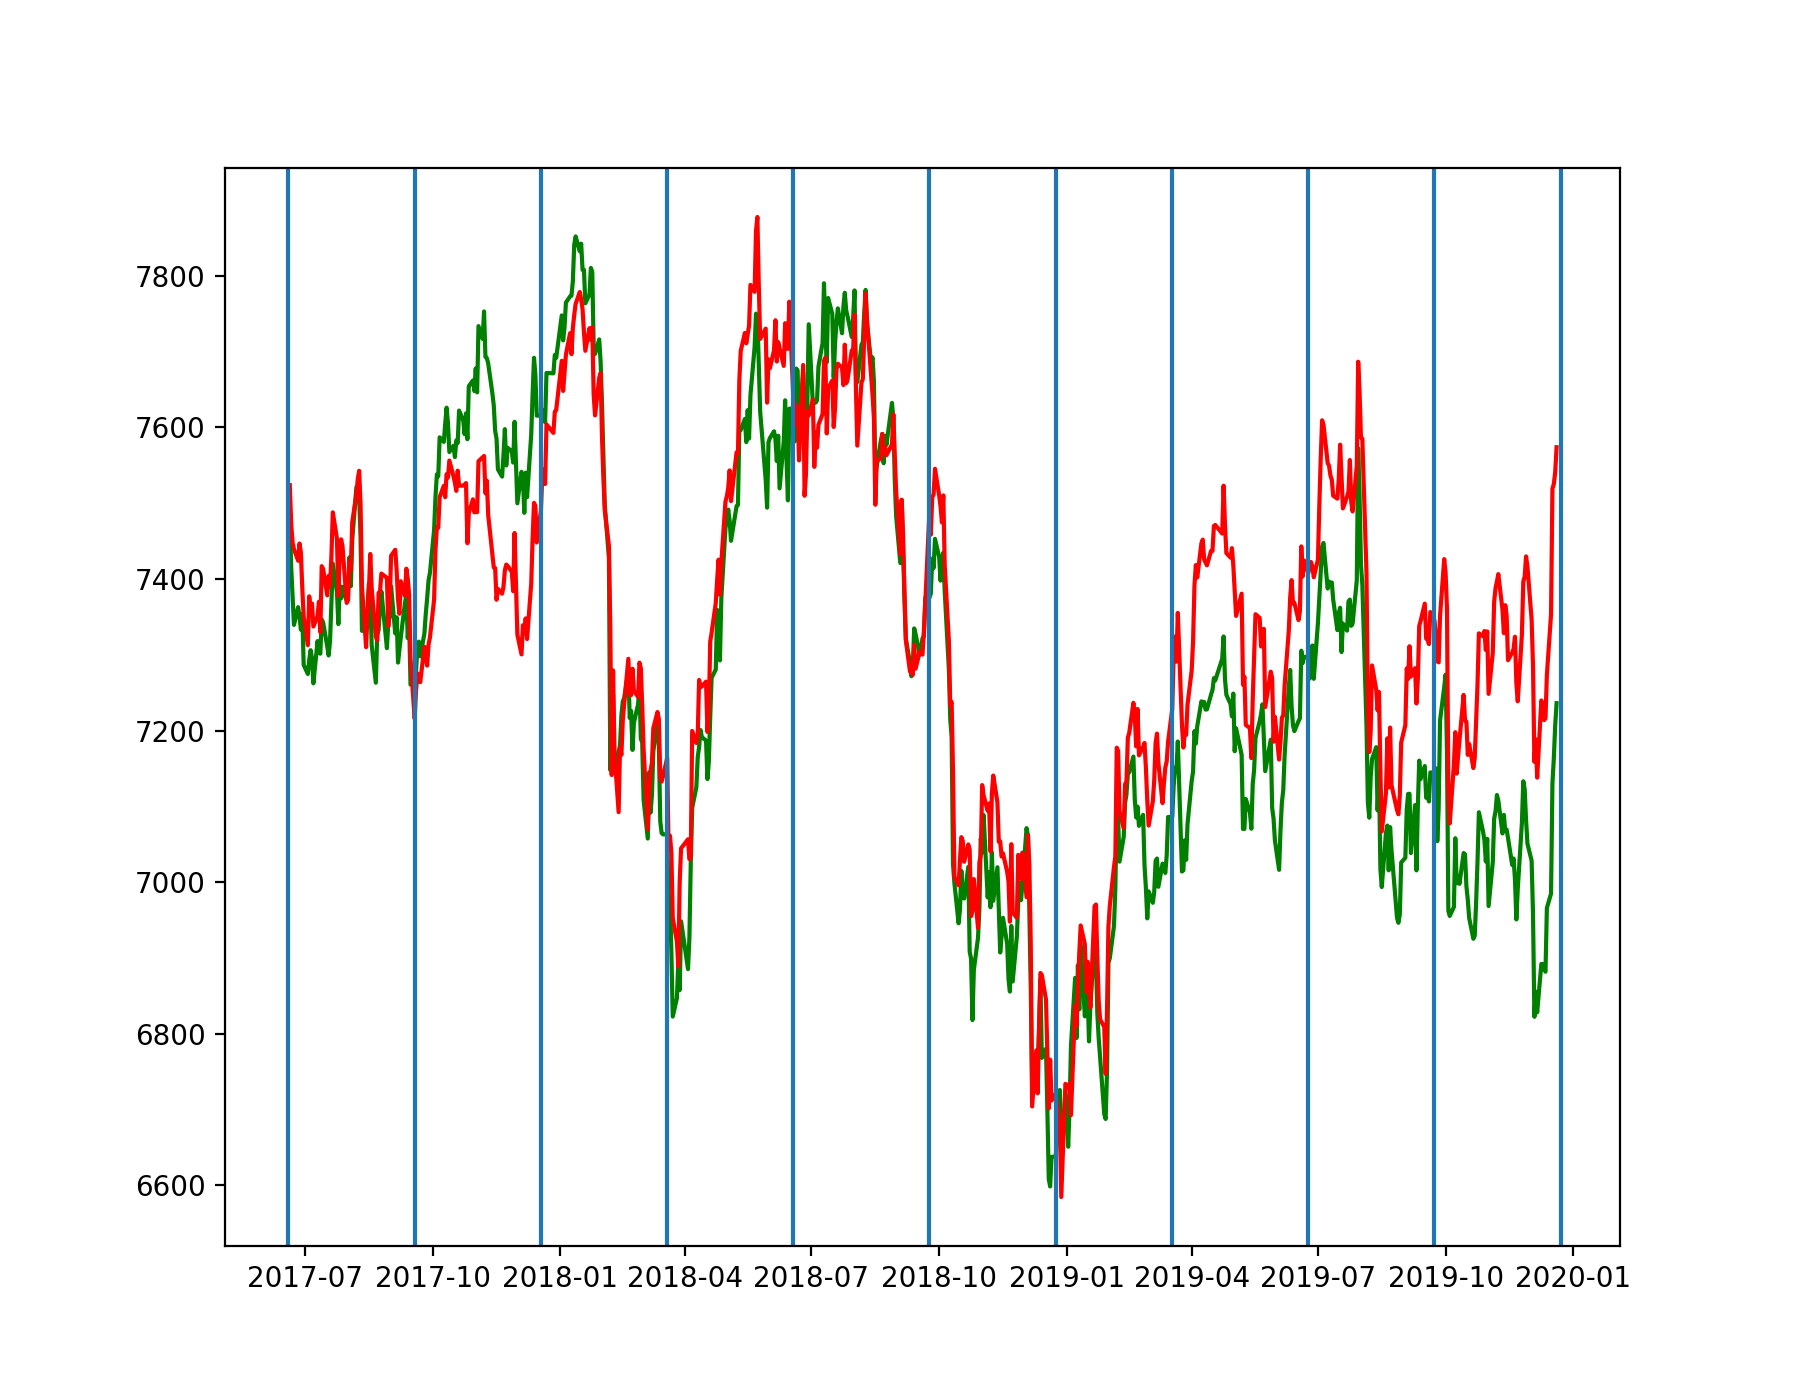

In [185]:
FTSEq317 = FTSE[(FTSE['Date'] > quarterCutOffDates[0]) & (FTSE['Date'] < quarterCutOffDates[10])]['Open'].values
FTSEq317date = FTSE[(FTSE['Date'] > quarterCutOffDates[0]) & (FTSE['Date'] < quarterCutOffDates[10])]['Date'].values

f = plt.figure(figsize=(9,7))
axs = f.add_subplot(111)
axs.plot(FTSEPrice3yr.index.values,FTSEPrice3yr.values,'g')
axs.plot(FTSEq317date,FTSEq317,'r')
for quarter in quarterCutOffDates:
    axs.axvline(x=quarter)